In [11]:
import pandas as pd
import matplotlib.pyplot as plt

from utils import CSV_DAILY_INTENSITIES

# Preview datasets

In [3]:
daily_intensites = pd.read_csv(CSV_DAILY_INTENSITIES)

print(daily_intensites)

             Id ActivityDay  SedentaryMinutes  LightlyActiveMinutes  \
0    1503960366   4/12/2016               728                   328   
1    1503960366   4/13/2016               776                   217   
2    1503960366   4/14/2016              1218                   181   
3    1503960366   4/15/2016               726                   209   
4    1503960366   4/16/2016               773                   221   
..          ...         ...               ...                   ...   
935  8877689391    5/8/2016              1174                   245   
936  8877689391    5/9/2016              1131                   217   
937  8877689391   5/10/2016              1187                   224   
938  8877689391   5/11/2016              1127                   213   
939  8877689391   5/12/2016               770                   137   

     FairlyActiveMinutes  VeryActiveMinutes  SedentaryActiveDistance  \
0                     13                 25                     0.00   
1  

# Describe Datasets

In [8]:
print(daily_intensites.describe())
print(daily_intensites.columns.tolist())


                 Id  SedentaryMinutes  LightlyActiveMinutes  \
count  9.400000e+02        940.000000            940.000000   
mean   4.855407e+09        991.210638            192.812766   
std    2.424805e+09        301.267437            109.174700   
min    1.503960e+09          0.000000              0.000000   
25%    2.320127e+09        729.750000            127.000000   
50%    4.445115e+09       1057.500000            199.000000   
75%    6.962181e+09       1229.500000            264.000000   
max    8.877689e+09       1440.000000            518.000000   

       FairlyActiveMinutes  VeryActiveMinutes  SedentaryActiveDistance  \
count           940.000000         940.000000               940.000000   
mean             13.564894          21.164894                 0.001606   
std              19.987404          32.844803                 0.007346   
min               0.000000           0.000000                 0.000000   
25%               0.000000           0.000000                 

# Cleaning dataset

In [5]:
users_in_daily_intensites = daily_intensites['Id'].nunique()

print("Number of users in daily_intensites:", users_in_daily_intensites)

# Find and remove duplicates 
print("Duplicates in daily_intensites:", daily_intensites.duplicated().sum())
daily_intensites.drop_duplicates(inplace=True)

Number of users in daily_intensites: 33
Duplicates in daily_intensites: 0


# Trends in Activity Zone

In [17]:
# Group data by user and calculate mean distance and mean time per instensity level

daily_intensites_grouped = daily_intensites.groupby("Id").agg({
    'SedentaryMinutes': 'mean',
    'SedentaryActiveDistance': 'mean',
    'LightlyActiveMinutes': 'mean',
    'LightActiveDistance': 'mean',
    'FairlyActiveMinutes': 'mean',
    'ModeratelyActiveDistance': 'mean',
    'VeryActiveMinutes': 'mean',
    'VeryActiveDistance': 'mean'
}).reset_index()

# Flatten column names
# daily_intensites_grouped.columns = ['_'.join(col).strip('_') for col in daily_intensites_grouped.columns.values]

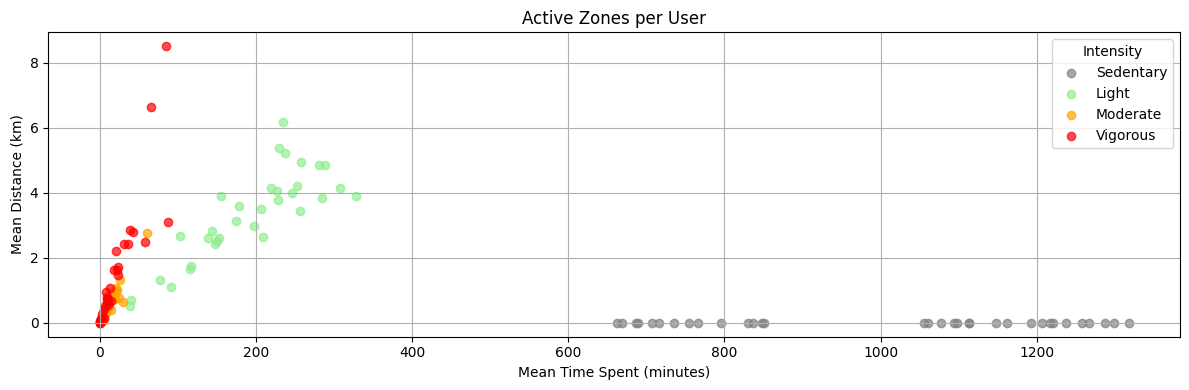

In [ ]:
# Scatter plot of time and distance of Acitvity Instensites

# Define zones and their colors
zones = {
    'Sedentary': ('SedentaryMinutes', 'SedentaryActiveDistance', 'gray'),
    'Light': ('LightlyActiveMinutes', 'LightActiveDistance', 'lightgreen'),
    'Moderate': ('FairlyActiveMinutes', 'ModeratelyActiveDistance', 'orange'),
    'Vigorous': ('VeryActiveMinutes', 'VeryActiveDistance', 'red')
}

# Plot scatter points for each zone

plt.figure(figsize=(12, 4))

for label, (time_col, dist_col, color) in zones.items():
    plt.scatter(daily_intensites_grouped[time_col], daily_intensites_grouped[dist_col], label=label, color=color, alpha=0.7)

# Labels and title
plt.xlabel("Mean Time Spent (minutes)")
plt.ylabel("Mean Distance (km)")
plt.title("Activity Zones per User")
plt.legend(title="Intensity")
plt.grid(True)
plt.tight_layout()
plt.show()


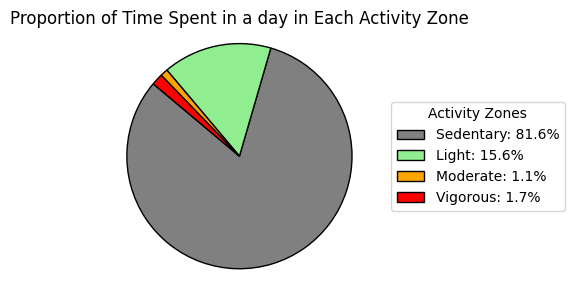

In [69]:
# PIE CHART of time spent in activity zone of the total device usage.

# Sum time spent in each zone across all users
zone_time_totals = {
    'Sedentary': daily_intensites_grouped['SedentaryMinutes'].sum(),
    'Light': daily_intensites_grouped['LightlyActiveMinutes'].sum(),
    'Moderate': daily_intensites_grouped['FairlyActiveMinutes'].sum(),
    'Vigorous': daily_intensites_grouped['VeryActiveMinutes'].sum()
}

# Convert to percentages
total_minutes = sum(zone_time_totals.values())
zone_time_percentages = {
    zone: round((minutes / total_minutes) * 100, 1)
    for zone, minutes in zone_time_totals.items()
}

# Labels, values, and colors
labels = list(zone_time_totals.keys())
sizes = list(zone_time_totals.values())
colors = ['gray', 'lightgreen', 'orange', 'red']

# Create custom legend labels with percentages
legend_labels = [
    f"{zone}: {percent}%" for zone, percent in zone_time_percentages.items()
]

# Plotting the pie chart
plt.figure(figsize=(5,3))
wedges, texts = plt.pie(
    sizes,
    labels=None,
    colors=colors,
    startangle=140,
    wedgeprops={'edgecolor': 'black'}
)

# Add legend on the right
plt.legend(wedges, legend_labels, title="Activity Zones", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title("Proportion of Time Spent in a day in Each Activity Zone")
plt.axis('equal')
plt.tight_layout()
plt.show()
